In [12]:
### Training and Testing Split ----> splitting data into 70% train -30% test.
### Validation set ---> for further tuning ---> if used ---> 70-15-15.

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("carprices.csv")
df = df.drop("Car Model", axis=1)
df

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


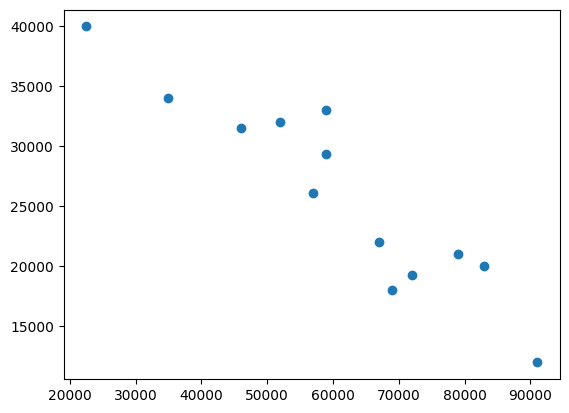

In [21]:
# feature-target visualization
# mileage(X-axis) vs sell-price(Y-axis)

plt.scatter(df["Mileage"], df["Sell Price($)"])

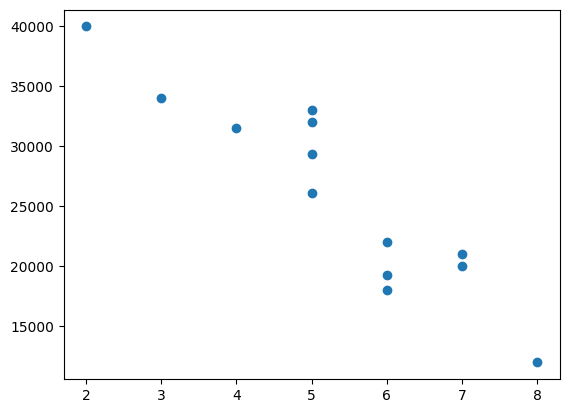

In [22]:
# feature-target visualization
# age(X-axis) vs sell-price(Y-axis)

plt.scatter(df["Age(yrs)"], df["Sell Price($)"])

In [27]:
# based on the plot ---> regression would fit data well
# selected model linear regression.
# variable assignment and data splitting

X = df[["Mileage","Age(yrs)"]]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [29]:
y = df["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [74]:
# splitting data for training and testing ---> 70-30
# random state ensures the train and test set remain fixed once randomly chosen
# if random state not used ---> train and test sets will alter on every run
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [75]:
print(X_train,'\n')
print("len of train set: ", len(X_train)) # 70% of 13 samples
print("len of test set: ",len(X_test))

    Mileage  Age(yrs)
9     67000         6
12    59000         5
10    83000         7
4     46000         4
8     91000         8
0     69000         6
11    79000         7
6     52000         5
3     22500         2 

len of train set:  9
len of test set:  4


In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # fitting the model to the train data set.

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
test_predictions = model.predict(X_test)
print("test-predictions: ", test_predictions)
print("actual y for test set: \n", y_test)

test-predictions:  [27597.49667247 36998.79696939 22691.25627112 28008.67717825]
actual y for test set: 
 5    29400
1    34000
7    19300
2    26100
Name: Sell Price($), dtype: int64


In [78]:
model.score(X_test, y_test)

0.761242640134782

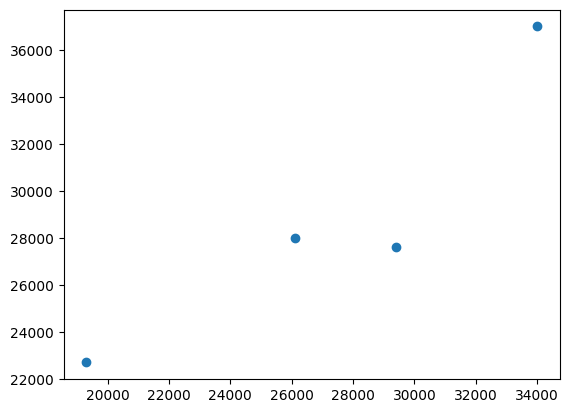

In [79]:
plt.scatter(y_test, test_predictions)

In [80]:
# change the value of the random state till a good accuracy score is reached as 
# num samples is sparse.
# with a random state val of 42 ---->  -0.6 accuracy score achieved